In [1]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

In [15]:
path = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW150\spine_data\FOV3_apical\JW150_FOV3_apical_Early_dual_spine_data"

In [16]:
data = load_pickle([path])[0]

In [17]:
data.__dict__.keys()

dict_keys(['mouse_id', 'session', 'date', 'time', 'lever_force_resample', 'lever_force_smooth', 'lever_velocity_envelope', 'lever_active', 'rewarded_movement_force', 'rewarded_movement_binary', 'binary_cue', 'reward_delivery', 'punish_delivery', 'spine_ids', 'spine_flags', 'spine_grouping', 'spine_positions', 'spine_GluSnFr_dFoF', 'spine_GluSnFr_processed_dFoF', 'spine_GluSnFr_activity', 'spine_GluSnFr_floored', 'spine_calcium_dFoF', 'spine_calcium_processed_dFoF', 'spine_calcium_activity', 'spine_calcium_floored', 'dendrite_length', 'dendrite_calcium_dFoF', 'dendrite_calcium_processed_dFoF', 'dendrite_calcium_activity', 'dendrite_calcium_floored', 'spine_volume', 'corrected_spine_volume', 'movement_spines', 'reward_movement_spines', 'silent_spines', 'reward_silent_spines', 'spine_movement_activity', 'spine_reward_activity', 'movement_dendrites', 'reward_movement_dendrites', 'silent_dendrites', 'reward_silent_dendrites', 'dendrite_movement_activity', 'dendrite_reward_activity', 'imagin

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
100 * 60

6000

<IPython.core.display.Javascript object>


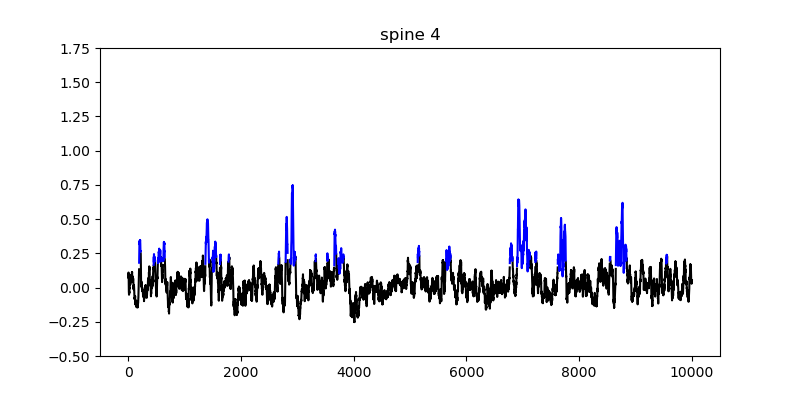

<IPython.core.display.Javascript object>


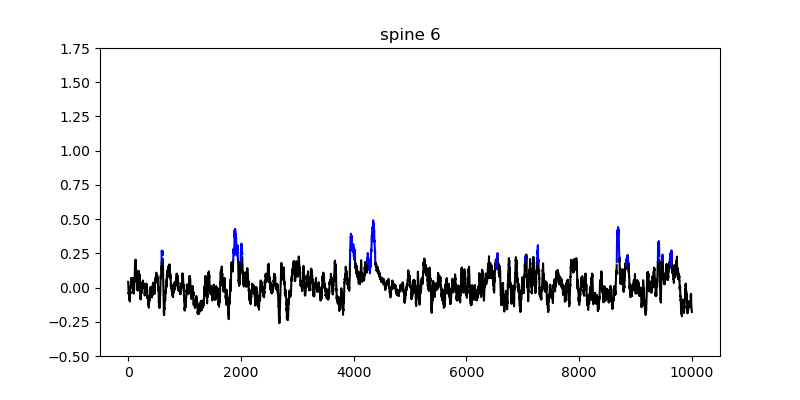

<IPython.core.display.Javascript object>


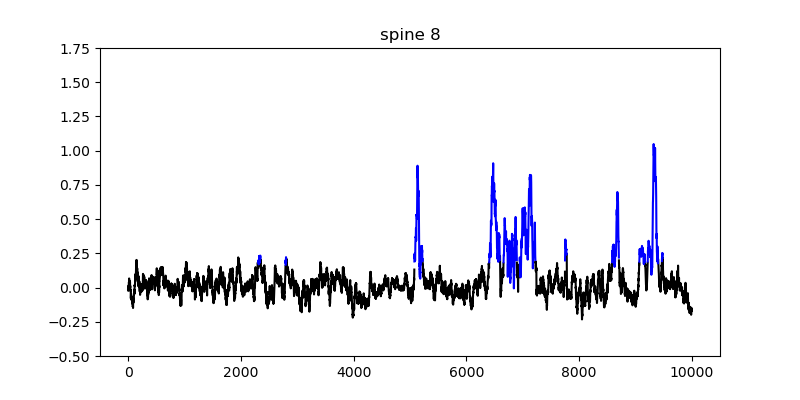

<IPython.core.display.Javascript object>


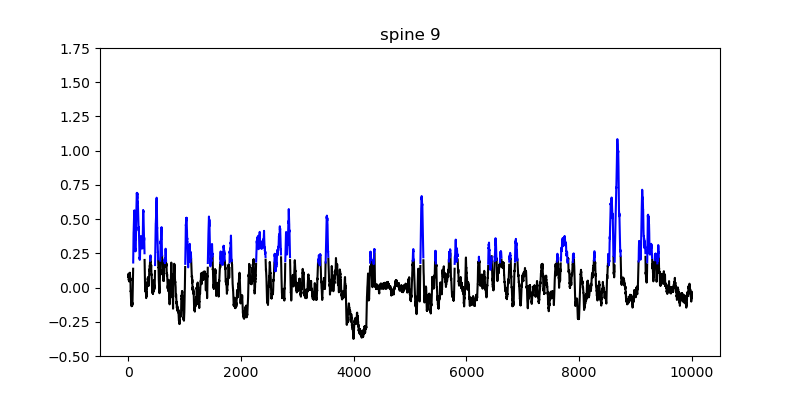

<IPython.core.display.Javascript object>


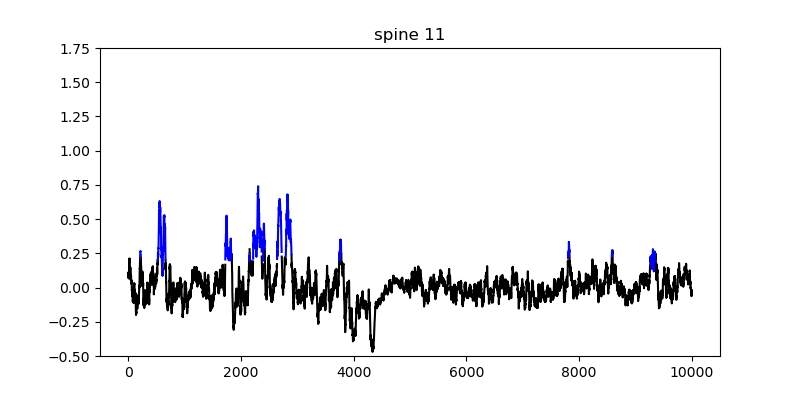

<IPython.core.display.Javascript object>


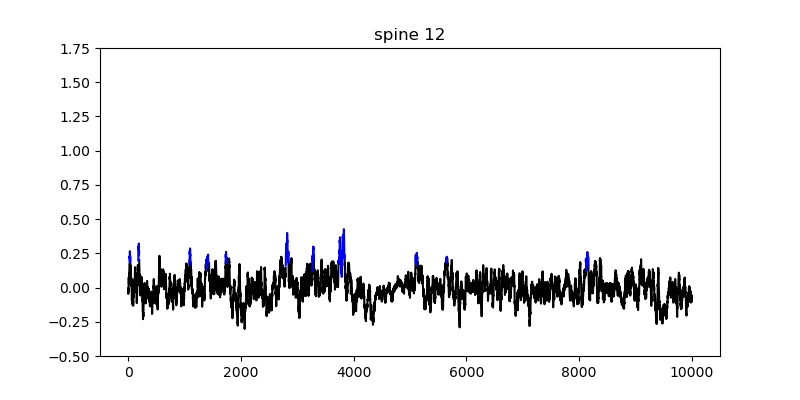

<IPython.core.display.Javascript object>


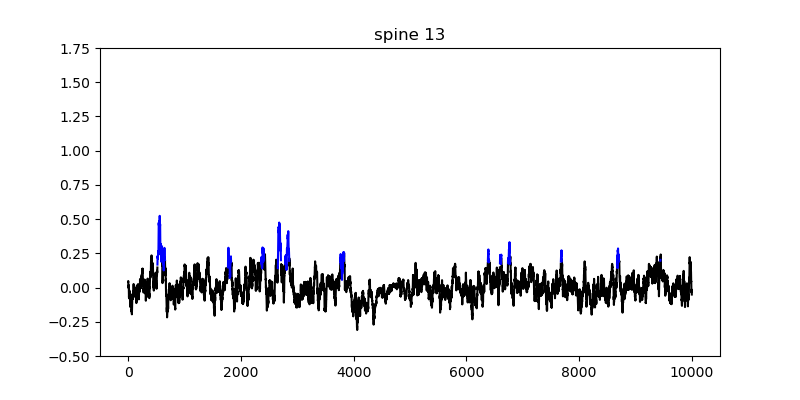

<IPython.core.display.Javascript object>


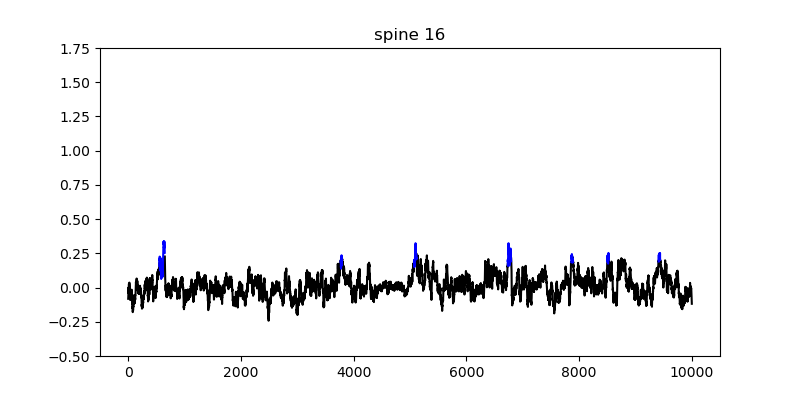

<IPython.core.display.Javascript object>


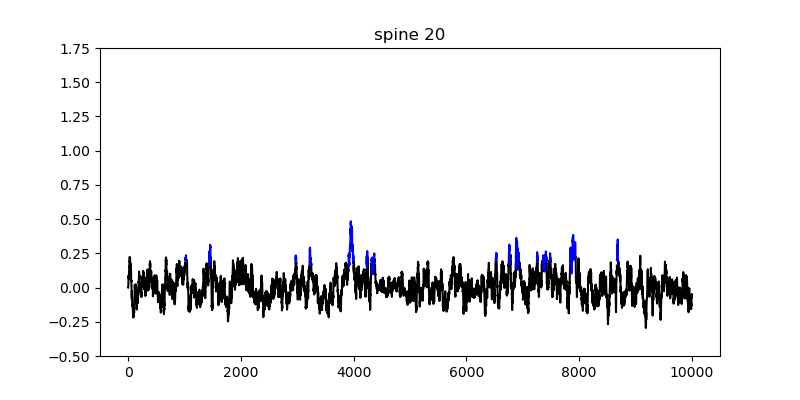

<IPython.core.display.Javascript object>


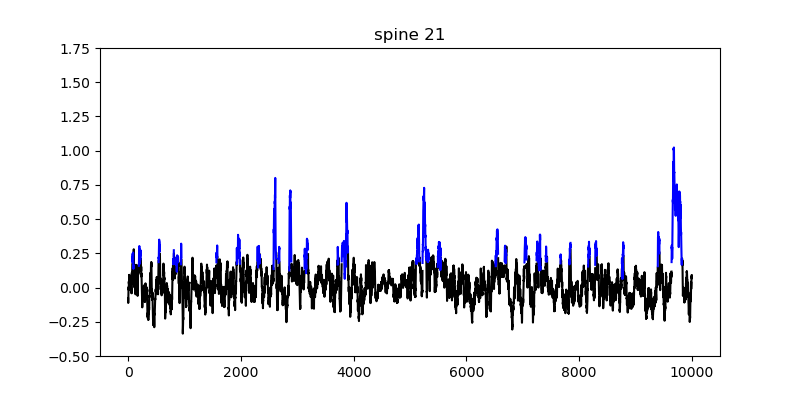

<IPython.core.display.Javascript object>


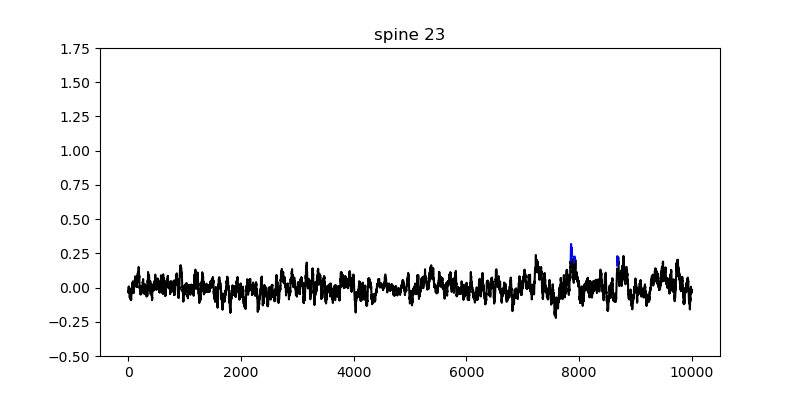

<IPython.core.display.Javascript object>


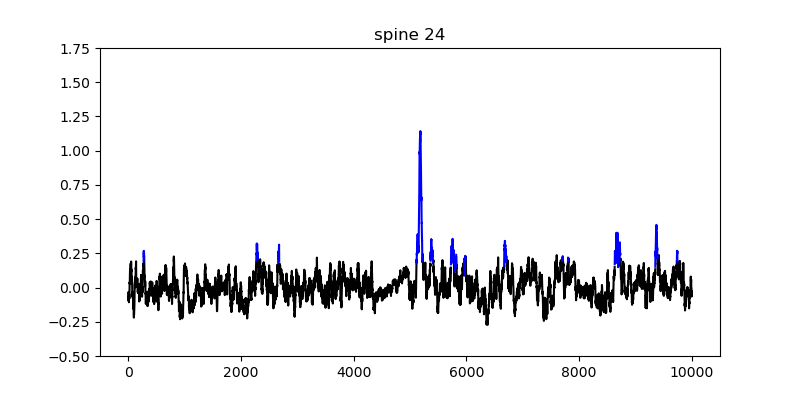

<IPython.core.display.Javascript object>


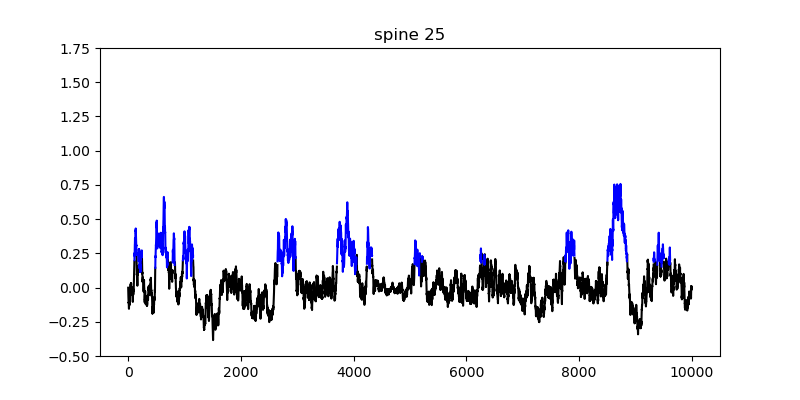

<IPython.core.display.Javascript object>


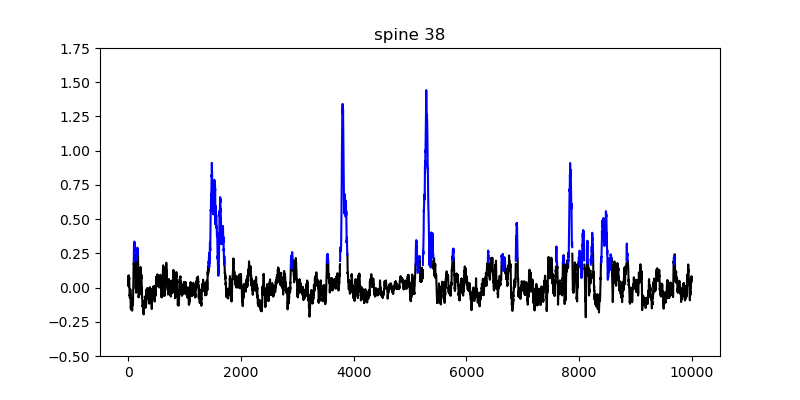

<IPython.core.display.Javascript object>


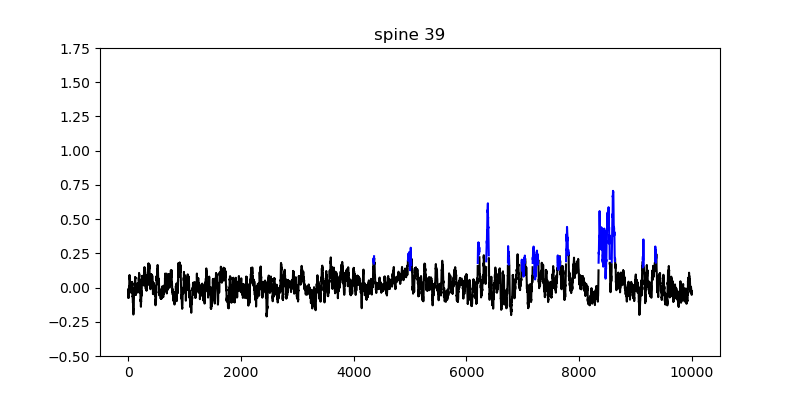

In [41]:
import numpy as np
import os
groupings = data.spine_grouping[0]
spines = [4,6,8,9,11,12,13,16,20,21,23,24,25,38,39]
save_path = r"C:\Users\Jake\Desktop"
for i in spines:
    plt.figure(figsize=(8,4))
    plt.title(f"spine {i}")
    dfof = data.spine_GluSnFr_processed_dFoF[30000:40000, i]
    activity = data.spine_GluSnFr_activity[30000:40000, i]
    above = dfof * activity
    below = dfof * (1-activity)
    above[above==0] = np.nan
    below[below==0] = np.nan
    plt.plot(below, color="black")
    plt.plot(above, color="blue")
    plt.ylim(-0.5, 1.75)
    name = os.path.join(save_path, f"spine_{i}.pdf")
    plt.savefig(name, dpi=300)

In [53]:
from Lab_Analyses.Utilities.event_detection import event_detection
events, _, _ = event_detection(data.dendrite_calcium_processed_dFoF, threshold=2, lower_threshold=0, lower_limit=0, sampling_rate=60)

<IPython.core.display.Javascript object>


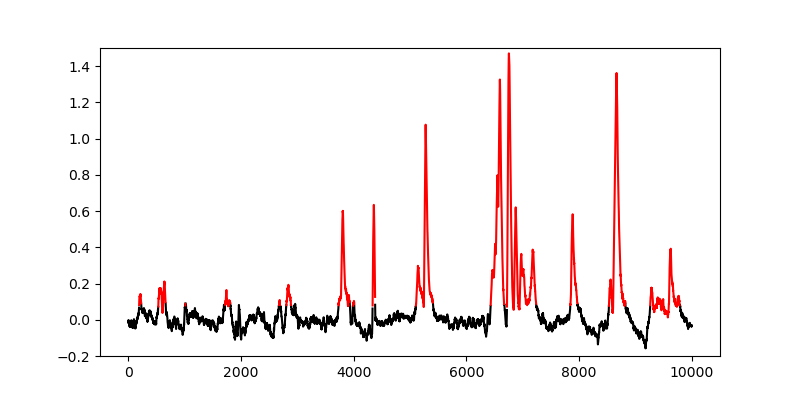

In [57]:
plt.figure(figsize=(8,4))
above = data.dendrite_calcium_processed_dFoF[30000:40000, 0] * events[30000:40000, 0]
above[above==0] = np.nan
below = data.dendrite_calcium_processed_dFoF[30000:40000, 0] * (1-events[30000:40000, 0])
below[below==0] = np.nan
plt.plot(below, color="black")
plt.plot(above, color="red")
plt.ylim(-0.2, 1.5)
name = os.path.join(save_path, f"dendrite.pdf")
plt.savefig(name, dpi=300)